In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Import all data

In [2]:
X_train = pd.read_parquet("Xtime/X_train.parquet")
X_test = pd.read_parquet("Xtime/X_test.parquet")
Y_train = pd.read_parquet("Ytime/Y_train.parquet")
Y_test = pd.read_parquet("Ytime/Y_test.parquet")
X_train = X_train[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
X_test = X_test[['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']]
Complete = pd.read_parquet("time_dataset.parquet")

In [3]:
scalerX = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scalerX.transform(X_train))
X_test = pd.DataFrame(scalerX.transform(X_test))
scalerY = MinMaxScaler().fit(Y_train)
Y_train = pd.DataFrame(scalerY.transform(Y_train))
Y_test = pd.DataFrame(scalerY.transform(Y_test))

In [4]:
Y1_train = Y_train[[Y_train.columns[0]]]
Y1_test = Y_test[[Y_test.columns[0]]]
Y2_train = Y_train[[Y_train.columns[1]]]
Y2_test = Y_test[[Y_test.columns[1]]]
Y3_train = Y_train[[Y_train.columns[2]]]
Y3_test = Y_test[[Y_test.columns[2]]]
Y4_train = Y_train[[Y_train.columns[3]]]
Y4_test = Y_test[[Y_test.columns[3]]]
Y5_train = Y_train[[Y_train.columns[4]]]
Y5_test = Y_test[[Y_test.columns[4]]]
Y6_train = Y_train[[Y_train.columns[5]]]
Y6_test = Y_test[[Y_test.columns[5]]]

## Train and score

In [5]:
parameters = {'kernel':['linear', 'rbf'],
              'C':[0.5, 1, 5, 10, 50, 100, 500, 1000],
              'epsilon':[0.1,0.01,0.001]}

In [6]:
def GridSearch(rf, X_train, X_test, y_train, y_test, grid, verbose=False, skip=False):
    best_score = 0
    par = ParameterGrid(grid)
    ln = len(par)
    i = 0
    for g in par:
        if skip and i == 46:
            continue
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [7]:
g = GridSearch(svm.SVR(), X_train, X_test, Y1_train, Y1_test, parameters, verbose=True)
clf1 = svm.SVR(**g).fit(X_train, np.ravel(Y1_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.014623165130615234 s, score: 0.9242402030935484
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.020822763442993164 s, score: 0.8396178587595235
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.06179404258728027 s, score: 0.9991565344245478
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.03846573829650879 s, score: 0.988465941458733
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.4230329990386963 s, score: 0.9997475812764913
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.19558238983154297 s, score: 0.989422937112329
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.011304378509521484 s, score: 0.9175209051466363
Probando: {'C': 1, 'epsil

In [8]:
g = GridSearch(svm.SVR(), X_train, X_test, Y2_train, Y2_test, parameters, verbose=True)
clf2 = svm.SVR(**g).fit(X_train, np.ravel(Y2_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.016912460327148438 s, score: 0.9700764933596301
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.02508711814880371 s, score: 0.9316351230886605
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.06641364097595215 s, score: 0.9982489255140156
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.0818934440612793 s, score: 0.9908111941399679
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.42497754096984863 s, score: 0.9985108055305931
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.14175820350646973 s, score: 0.9938003730019094
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.029015302658081055 s, score: 0.9710731677911799
Probando: {'C': 1, 'epsi

In [9]:
g = GridSearch(svm.SVR(), X_train, X_test, Y3_train, Y3_test, parameters, verbose=True)
clf3 = svm.SVR(**g).fit(X_train, np.ravel(Y3_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.02328181266784668 s, score: 0.9225206172500324
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.01914238929748535 s, score: 0.8532225332161671
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.10317540168762207 s, score: 0.9983871845307989
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.037364959716796875 s, score: 0.9852011490673122
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.6354660987854004 s, score: 0.9990942999568193
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.15861868858337402 s, score: 0.9885762290522726
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.015527725219726562 s, score: 0.9240462197225907
Probando: {'C': 1, 'epsi

In [10]:
g = GridSearch(svm.SVR(), X_train, X_test, Y4_train, Y4_test, parameters, verbose=True, skip=True) #Saltar siempre el 46 (tarda demasiado)
clf4 = svm.SVR(**g).fit(X_train, np.ravel(Y4_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.016637802124023438 s, score: 0.9487322595942004
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.007760524749755859 s, score: 0.787051454931111
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.07236003875732422 s, score: 0.9973152177990149
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.04021406173706055 s, score: 0.985494796765529
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.5508365631103516 s, score: 0.9988237228155552
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.1658775806427002 s, score: 0.9898366285789434
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.013483524322509766 s, score: 0.9487392465551634
Probando: {'C': 1, 'epsilo

In [11]:
g = GridSearch(svm.SVR(), X_train, X_test, Y5_train, Y5_test, parameters, verbose=True)
clf5 = svm.SVR(**g).fit(X_train, np.ravel(Y5_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.037137746810913086 s, score: 0.8961978783685629
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.026908159255981445 s, score: 0.8053984319041965
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.09947562217712402 s, score: 0.9969461257190753
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.050469160079956055 s, score: 0.9818131070741056
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.5599319934844971 s, score: 0.9985659431040594
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.12482380867004395 s, score: 0.9845675077300892
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.024585247039794922 s, score: 0.9131809280609912
Probando: {'C': 1, 'ep

In [12]:
g = GridSearch(svm.SVR(), X_train, X_test, Y6_train, Y6_test, parameters, verbose=True)
clf6 = svm.SVR(**g).fit(X_train, np.ravel(Y6_train))

Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}, 0 de 48
Tiempo de entrenamiento: 0.02519083023071289 s, score: 0.9546304757047237
Probando: {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}, 1 de 48
Tiempo de entrenamiento: 0.022365331649780273 s, score: 0.8563605997509718
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'linear'}, 2 de 48
Tiempo de entrenamiento: 0.07097625732421875 s, score: 0.9991918414513304
Probando: {'C': 0.5, 'epsilon': 0.01, 'kernel': 'rbf'}, 3 de 48
Tiempo de entrenamiento: 0.045622825622558594 s, score: 0.987549883795383
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'linear'}, 4 de 48
Tiempo de entrenamiento: 0.348064661026001 s, score: 0.999675457711269
Probando: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}, 5 de 48
Tiempo de entrenamiento: 0.12629437446594238 s, score: 0.9912918167596326
Probando: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}, 6 de 48
Tiempo de entrenamiento: 0.02413153648376465 s, score: 0.9521799508871119
Probando: {'C': 1, 'epsilon

## Test for each year

In [13]:
np.abs(clf1.predict(X_test.iloc[0::4]) - np.array(Y1_test.iloc[0::4][0])).mean()

0.0013526984822377949

In [14]:
np.abs(clf1.predict(X_test.iloc[1::4]) - np.array(Y1_test.iloc[1::4][0])).mean()

0.0012591971771323263

In [15]:
np.abs(clf1.predict(X_test.iloc[2::4]) - np.array(Y1_test.iloc[2::4][0])).mean()

0.0018410001453809507

In [16]:
np.abs(clf1.predict(X_test.iloc[3::4]) - np.array(Y1_test.iloc[3::4][0])).mean()

0.001329745750490052

## One concrete example

In [17]:
i = 120
scalerY.inverse_transform([[clf1.predict([X_test.iloc[i]])[0], clf2.predict([X_test.iloc[i]])[0], clf3.predict([X_test.iloc[i]])[0], 
                          clf4.predict([X_test.iloc[i]])[0], clf5.predict([X_test.iloc[i]])[0], clf6.predict([X_test.iloc[i]])[0], 0]])

array([[ 58530.43894245, 136759.31003616,   3167.53801226,
           838.68480292,   2374.73048879,  50037.85608335,
          1992.        ]])

In [18]:
scalerY.inverse_transform([Y_test.iloc[i]])

array([[ 57900., 136649.,   3206.,    821.,   2385.,  49816.,   2014.]])

## Probamos con España

In [19]:
country = 'ESP'
esp = Complete[Complete.COU == country]

### Municipal

In [20]:
years = list(esp.Year)
mun = list(esp.Municipal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[0] for a in scalerY.inverse_transform([[a,0,0,0,0,0,0] for a in predictions])]

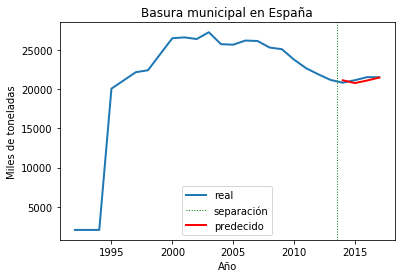

In [21]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura municipal en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Household

In [22]:
years = list(esp.Year)
mun = list(esp.Household)
predictions = clf2.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[1] for a in scalerY.inverse_transform([[0,a,0,0,0,0,0] for a in predictions])]

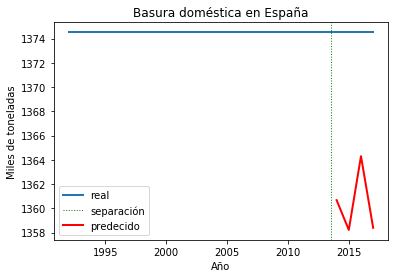

In [23]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura doméstica en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recovered

In [24]:
years = list(esp.Year)
mun = list(esp.Recovered)
predictions = clf3.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[2] for a in scalerY.inverse_transform([[0,0,a,0,0,0,0] for a in predictions])]

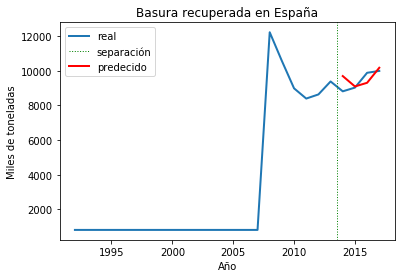

In [25]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura recuperada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Recicled

In [26]:
years = list(esp.Year)
mun = list(esp.Recicled)
predictions = clf4.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[3] for a in scalerY.inverse_transform([[0,0,0,a,0,0,0] for a in predictions])]

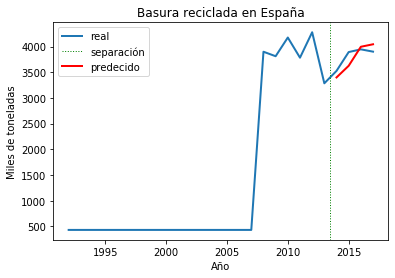

In [27]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura reciclada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Compost

In [28]:
years = list(esp.Year)
mun = list(esp.Compost)
predictions = clf5.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[4] for a in scalerY.inverse_transform([[0,0,0,0,a,0,0] for a in predictions])]

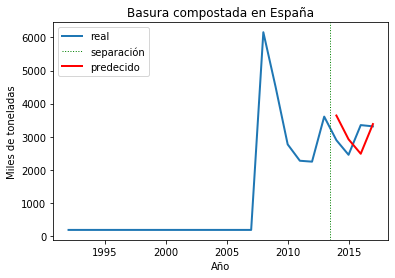

In [29]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura compostada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()

### Disposal

In [30]:
years = list(esp.Year)
mun = list(esp.Disposal)
predictions = clf1.predict(pd.DataFrame(scalerX.transform(Complete.loc[esp.index[-4:],:][['Built', 'Below Secundary', 'Income Median',
       'Population', 'Over 65', 'Over 65 Percentage', 'Over 85',
       'Over 85 Percentage', 'Over 50', 'Over 50 Percentage', 'Under 20',
       'Under 20 Percentage', 'Income Per Capita', 'Tourism', 'Area',
       'Built Area', 'Last Year Municipal', 'Last Year Household',
       'Last Year Recovered', 'Last Year Recicled', 'Last Year Compost',
       'Last Year Disposal',
       'Last Year Built', 'Difference Built',
       'Last Year Below Secundary', 'Difference Below Secundary',
       'Last Year Population', 'Difference Population', 'Last Year Tourism',
       'Difference Tourism']])))
predictions = [a[5] for a in scalerY.inverse_transform([[0,0,0,0,0,a,0] for a in predictions])]

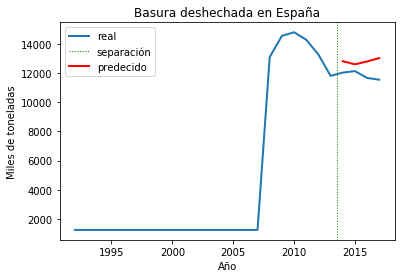

In [31]:
plt.plot(years, mun, lw=2, label='real')
plt.axvline(x=2013.5, c='green', lw=1, ls=':', label='separación')
plt.plot(years[-4:], predictions, c='red', lw=2, label='predecido')
plt.title("Basura deshechada en España")
plt.xlabel("Año")
plt.ylabel("Miles de toneladas")
plt.legend()
plt.show()